# Western Governors University
## D212: Data Mining II
## Clustering Techniques
### Shane Boyce

### Introduction

One of the most critical factors in customer relationship management that directly affects a company’s long-term profitability is understanding its customers. When a company can better understand its customer characteristics, it is better able to target products and marketing campaigns for customers, resulting in better profits for the company in the long term.


## Part I: Research Question

### A.  Describe the purpose of this data mining report by doing the following:

1.  Propose one question relevant to a real-world organizational situation that you will answer using one of the following clustering techniques:

•  k-means

•  hierarchical

Does k-means clustering provide meaningful results for this data set?
##### 2.  Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.

The goal of this dataset will be to determine the optimal number of clusters based on intertia and then to evaluate the silhouette score to ensure that the clusters are meaningful.


## Part II: Technique Justification

### B.  Explain the reasons for your chosen clustering technique from part A1 by doing the following:

1.  Explain how the clustering technique you chose analyzes the selected dataset. Include expected outcomes.

2.  Summarize one assumption of the clustering technique.

3.  List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.



In [23]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization extensions
from sklearn.cluster import KMeans # k-means clustering
from sklearn.preprocessing import RobustScaler # robust scaler due to data quality concerns
from sklearn import metrics # model evaluation
import churn_helper as ch # helper functions

import random # random number generator and setting seed

#settings
random.seed(42) # set random seed for reproducibility


df = pd.read_csv('churn_clean.csv')

df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [24]:
#apply autocleaner function from helper file
ch.churnauotclean(df)
df.head()

,State,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,...,MonthlyCharge,Bandwidth_GB_Year,Timeliness,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,AK,38,Urban,0,68,28561.99,Widowed,Male,0,7.978323,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,MI,10446,Urban,1,27,21704.77,Married,Female,1,11.699080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,OR,3735,Urban,4,50,9609.57,Widowed,Female,0,10.752800,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,CA,13863,Suburban,1,48,18925.23,Married,Male,0,14.913540,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,TX,11352,Suburban,0,83,40074.19,Separated,Male,1,8.147417,...,149.948316,271.493436,4,4,4,3,4,4,4,5


## Part III: Data Preparation

### C.  Perform data preparation for the chosen dataset by doing the following

1. Describe one data preprocessing goal relevant to the clustering technique from part A1.

This work will include 2 similar models: A full model of all continuous variables, and a reduced dataset using the statistically significant variables from the linear regression model used in previous analysis.

Since K-means clustering & PCA can only accurately work with continuous data, subsettng the datasets will be necessary. After subsetting the data, the data will be scaled using the RobustScaler to account for outliers. Robust Scaler is more appropriate than min-max scaler because it is less sensitive to outliers which are common in this dataset.

3. Identify the initial dataset variables that you will use to perform the analysis for the clustering question from part A1, and label each as continuous or categorical.

In [ ]:
continuous_vars = ['Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','MonthlyCharge','Bandwidth_GB_Year','Tenure']
stat_sig_vars = ['Age', 'MonthlyCharge', 'Bandwidth_GB_Year']

5. Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.


In [ ]:
df_cont = df[continuous_vars]
df_cont.head()

6. Provide a copy of the cleaned dataset.



## Part IV: Analysis

### D.  Perform the data analysis and report on the results by doing the following:

1.  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.


In [26]:
# scaling data
scaler = RobustScaler()

# copy as to not modify data on accident
df_scaled = df_cont.copy()

df_scaled = scaler.fit_transform(df_scaled)

df_scaled = pd.DataFrame(df_scaled, columns=df_cont.columns)

df_scaled.head()

,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year,Tenure
0,0.416667,-0.135462,-0.516350,-0.50,-0.5,1.0,0.081817,-0.546019,-0.534613
1,-0.722222,-0.337018,0.425311,0.00,-0.5,1.0,1.236890,-0.569826,-0.639889
2,-0.083333,-0.692535,0.185824,-0.75,-0.5,1.0,-0.124057,-0.281591,-0.367356
3,-0.138889,-0.418717,1.238837,0.75,0.5,0.0,-0.782281,-0.256331,-0.342468
4,0.833333,0.202919,-0.473555,1.00,0.5,1.0,-0.288639,-0.691557,-0.630288


In [27]:
# reduce dataset with statistically significant variables from linear regression
df_scaled_reduced = df_scaled[stat_sig_vars]
df_scaled_reduced.head()

,Age,MonthlyCharge,Bandwidth_GB_Year
0,0.416667,0.081817,-0.546019
1,-0.722222,1.236890,-0.569826
2,-0.083333,-0.124057,-0.281591
3,-0.138889,-0.782281,-0.256331
4,0.833333,-0.288639,-0.691557


2.  Provide the code used to perform the clustering analysis technique from part 2.



In [28]:
# k-means clustering, function developed as part of WGU DMDA Udacity Nano-Degree program
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)

    # Obtain a score related to the model fit
    score = np.abs(model.score(data))

    return score

In [29]:
%%timeit
# Investigate the change in within-cluster distance across number of clusters.

scores = []
centers = list(range(1,20))

for center in centers:
    scores.append(get_kmeans_score(df_scaled, center))

8.26 s ± 222 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Text(0.5, 1.0, 'SSE vs. K')

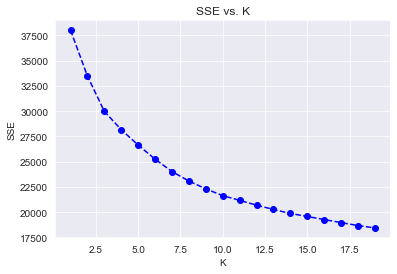

In [30]:
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K')

In [31]:
%%timeit
# Investigate the change in within-cluster distance across number of clusters.

red_scores = []
centers = list(range(1,20))

for center in centers:
    red_scores.append(get_kmeans_score(df_scaled_reduced, center))

5.99 s ± 150 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Text(0.5, 1.0, 'SSE vs. K')

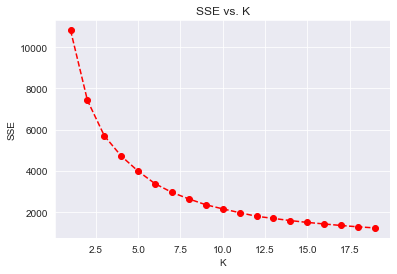

In [32]:
plt.plot(centers, red_scores, linestyle='--', marker='o', color='r');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K')


Text(0.5, 1.0, 'SSE vs. K')

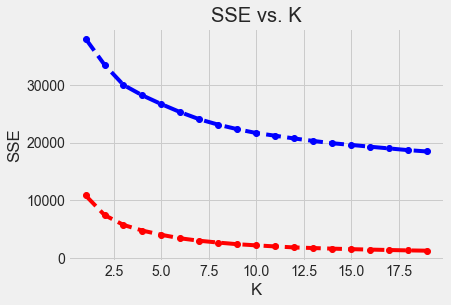

In [34]:
plt.style.use("fivethirtyeight")
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.plot(centers, red_scores, linestyle='--', marker='o', color='r');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K')

Both models show a similar trend in SSE vs. K, with a sharp drop in SSE from 1 to 2 clusters, and a more gradual drop from 2 to 3 clusters. 3 clusters seems to be the optimal number of clusters for both models as 2 clusters would not be enough clusters to provide meaningful insights, and 4 clusters would not provide any additional insights. The number of features selected for the full and reduced model are small and time is neglible for both models. If the reduced model and the full model provide similar clusters assignments, the reduced model will be used for the remainder of the analysis and as the go foward customer segmentation model.

In [37]:
#instantiating kmeans with 3 clusters

kmeans = KMeans(n_clusters=3)
fullmodel = kmeans.fit(df_scaled)
reducedmodel = kmeans.fit(df_scaled_reduced)

metrics.silhouette_score(df_scaled, fullmodel.labels_), metrics.silhouette_score(df_scaled_reduced, reducedmodel.labels_)

(0.07646855948959944, 0.2728761713982414)

## Part V: Data Summary and Implications

### E.  Summarize your data analysis by doing the following:

1. Explain the accuracy of your clustering technique.

Unsupervised learning does not have a target variable to compare against, so there is no way to determine the accuracy of the model. However, we can use the silhouette score to determine how well the model is performing. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, with 1 being the best score. The silhouette score for this model is 0.07 and 0.27 for the respective full and reduced models. These scores indicate that clusters have overlapping values. The reduced model has less overlap and a lower sum of squared error at the elbow of 3 clusters.

3. Discuss the results and implications of your clustering analysis.

This data with low silhouette score on full and reduced models indicates that the clusters are not well defined. Kmeans may not be a good approach to gather further insight into customer segmentation with this dataset.

5. Discuss one limitation of your data analysis.

A major limitation in this dataset is that many continous variables such as income are self reported by theend user customer. The issues with this have been extensively covered in previous analysis

7. Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.

This model could be rerean with a different seed or with a different clustering algorithm to see if the results are different. If the results are similar than customer segmentation for this dataset would need more features collected to potentially find meaninningful clusters.
